Demo section

In [7]:
from torchvision.models import resnet50, ResNet50_Weights
from torchvision.io import read_image
import torch
import torchvision.transforms as T

In [9]:
# Step 1: Initialize model with the best available weights
weights = ResNet50_Weights.IMAGENET1K_V1
model = resnet50(weights=weights)
model.eval();

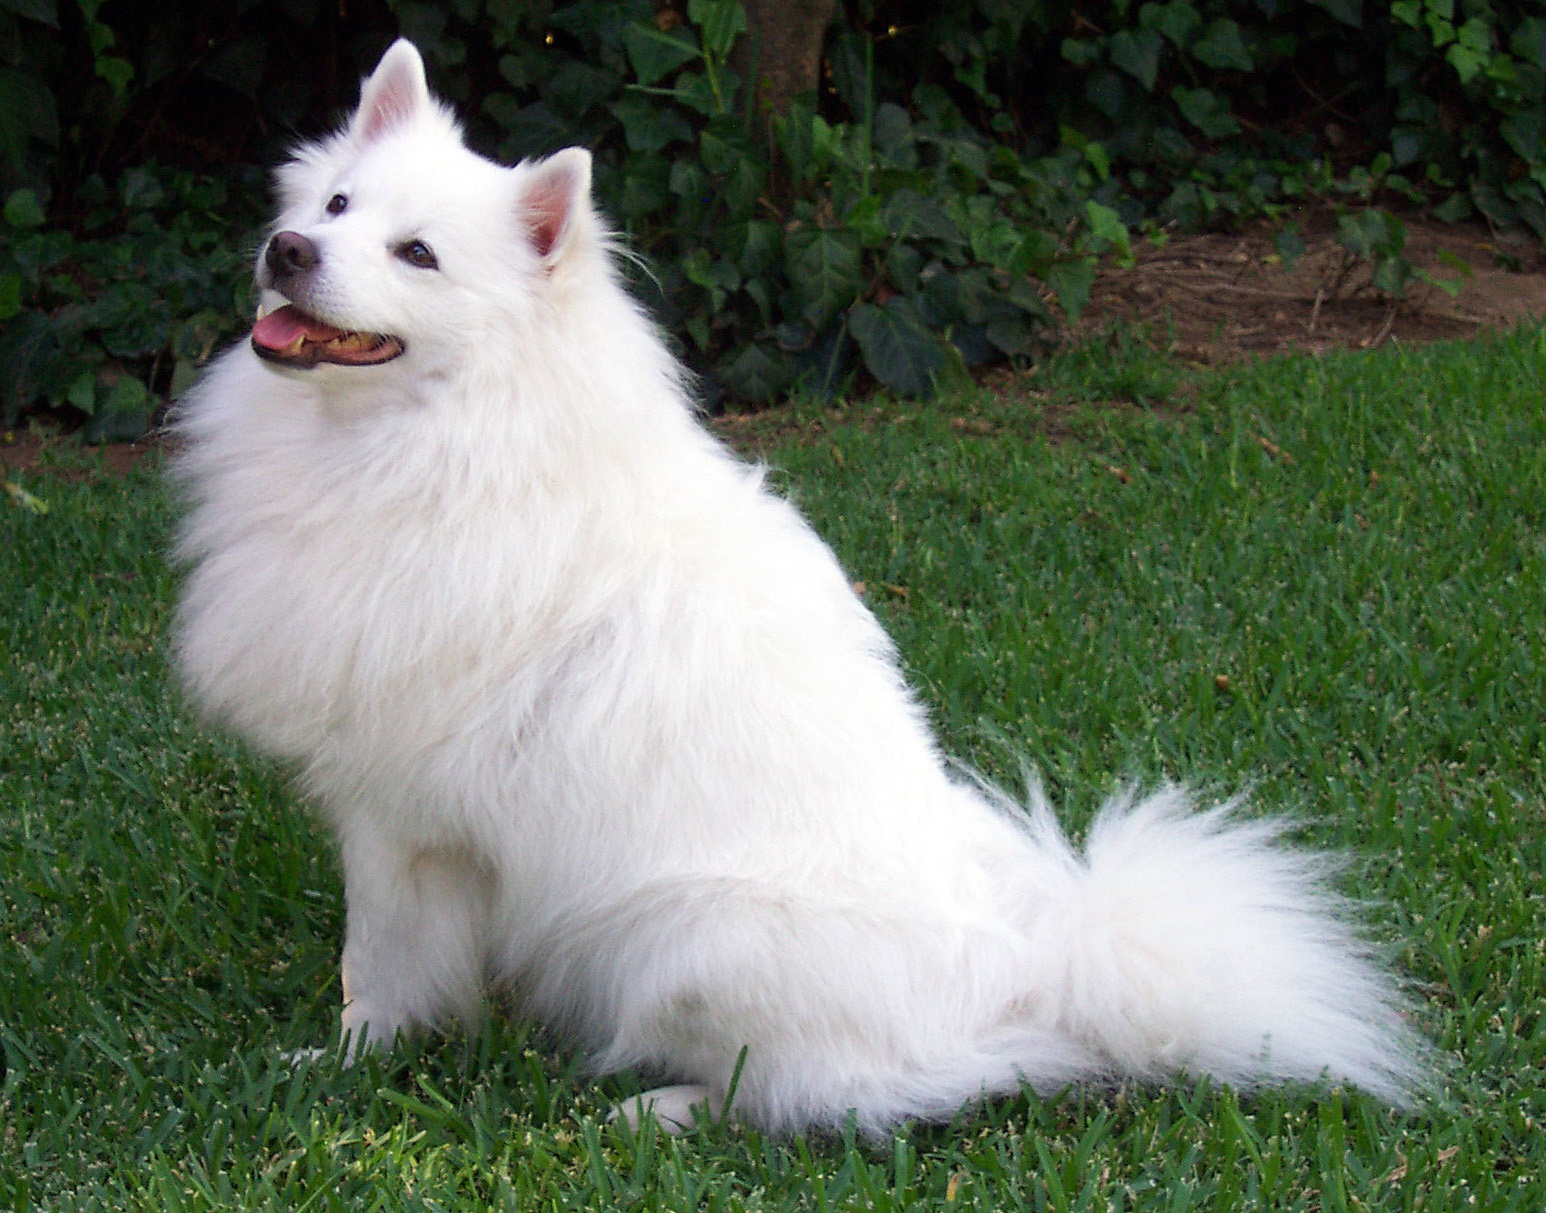

Samoyed: 87.9%


torch.return_types.topk(
values=tensor([0.8786, 0.0239, 0.0161], grad_fn=<TopkBackward0>),
indices=tensor([258, 259, 104]))

In [15]:
# img = read_image("test/assets/encode_jpeg/grace_hopper_517x606.jpg")
img = read_image("imgs/dog.jpg")
img_pil = T.ToPILImage()(img).show()

# img_pil.show()

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = preprocess(img).unsqueeze(0)

# Step 4: Use the model and print the predicted category
prediction = model(batch).squeeze(0).softmax(0)
class_id = prediction.argmax().item()
score = prediction[class_id].item()
category_name = weights.meta["categories"][class_id]
print(f"{category_name}: {100 * score:.1f}%")

prediction
class_id 
prediction.argmax().item()
prediction[class_id]
weights.meta
torch.topk(prediction, 3)

In [6]:
# Initialize the Weight Transforms
weights = ResNet50_Weights.DEFAULT
preprocess = weights.transforms()

# Apply it to the input image
img_transformed = preprocess(img)

img_transformed

tensor([[[-2.0494, -2.0152, -1.9980,  ..., -1.8268, -1.7412, -1.7583],
         [-2.0494, -2.0323, -1.8610,  ..., -1.9980, -2.0323, -1.8439],
         [-2.0837, -2.0323, -1.9295,  ..., -2.0323, -1.9980, -1.9980],
         ...,
         [-0.4739, -0.8678, -0.6452,  ..., -0.7137, -1.1760, -0.6109],
         [-1.2445, -0.6623, -1.2959,  ..., -1.0390, -1.3302, -1.1075],
         [-0.5424, -1.3130, -0.5596,  ..., -0.8335, -0.9877, -1.2788]],

        [[-2.0007, -2.0357, -1.9832,  ..., -1.5630, -1.5105, -1.5455],
         [-1.9832, -1.9832, -1.9482,  ..., -1.9657, -1.9657, -1.7731],
         [-2.0007, -1.9657, -1.9132,  ..., -2.0007, -1.9657, -1.9307],
         ...,
         [ 0.2927, -0.2675, -0.1275,  ..., -0.0049, -0.4251,  0.2227],
         [-0.5301,  0.4153, -0.7577,  ..., -0.5826, -0.8803, -0.2675],
         [-0.1099, -0.5651,  0.1877,  ..., -0.2150, -0.3375, -0.5126]],

        [[-1.7173, -1.8044, -1.7696,  ..., -1.3861, -1.3164, -1.3339],
         [-1.7696, -1.7347, -1.6999,  ..., -1

Demo of rotation and Hflip + Vflip